In [1]:
import numpy as np
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
import Convert
from ipy import *

In [2]:
date1     = dt.datetime(2015,10,26,4,1,0,0)
dateAug04 = dt.datetime(2015,8,4,13,30,0)
now       = dt.datetime.utcnow()

In [3]:
print date1
print dateAug04
print now

2015-10-26 04:01:00
2015-08-04 13:30:00
2016-11-07 22:04:46.326000


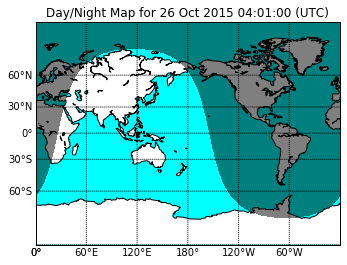

In [4]:
# miller projection
mill_map = Basemap(projection='mill',lon_0=180)
# plot coastlines, draw label meridians and parallels.
mill_map.drawcoastlines()
mill_map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
mill_map.drawmeridians(np.arange(mill_map.lonmin,mill_map.lonmax+30,60),labels=[0,0,0,1])
# fill continents 'coral' (with zorder=0), color wet areas 'aqua'
mill_map.drawmapboundary(fill_color='aqua')
mill_map.fillcontinents(color='white',lake_color='aqua')
# shade the night areas, with alpha transparency so the
# map shows through. Use current time in UTC.
#date = datetime.utcnow()
CS=mill_map.nightshade(date1)
plt.title('Day/Night Map for %s (UTC)' % date1.strftime("%d %b %Y %H:%M:%S"))
plt.show()

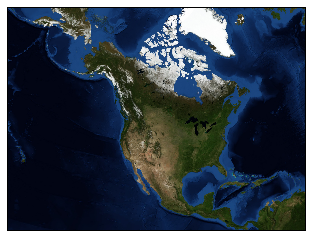

In [5]:
my_map = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
my_map.bluemarble()
plt.show()

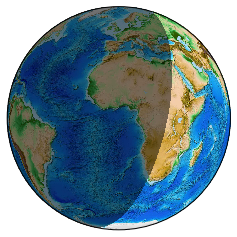

In [6]:
my_map2 = Basemap(projection='ortho',lat_0=0,lon_0=0)
my_map2.etopo()
my_map2.nightshade(date1)

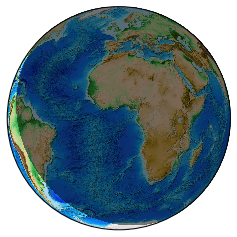

In [7]:
my_map2 = Basemap(projection='ortho',lat_0=0,lon_0=0)
my_map2.etopo()
my_map2.nightshade(now)

In [8]:
Fieldline_file = 'c:/users/cschiff/documents/GitHub/PAD/Aug 04 - pictures/Aug_04_13_30_00_fieldline_contiguous.txt'
Fieldline      = open(Fieldline_file,'r')
fld_blob       = Fieldline.readlines()
Fieldline.close()
fld            = np.zeros((len(fld_blob),3))

counter  = 0
for f in fld_blob:
    fld[counter,:] = map(float,f.strip('\r\n').split())
    counter        = counter + 1

In [9]:
MEC_file = 'Z:/mms1/mec/srvy/l2/epht89d/2015/08/mms1_mec_srvy_l2_epht89d_20150804_v2.1.0.cdf'

In [10]:
MEC = pycdf.CDF(MEC_file)

In [11]:
epoch_dict          = {}
epoch_dict['year']  = 2015
epoch_dict['month'] = 8
epoch_dict['day']   = 4
epoch_dict['hour']  = 13
epoch_dict['min']   = 30
epoch_dict['sec']   = 0

In [14]:
A_ecef_2_gci             = Convert.convert_ECEF_to_GCI(epoch_dict)
A_gci_2_gse              = Convert.convert_GCI_to_GSE(epoch_dict)
A_gse_2_gsm              = Convert.convert_GSE_to_GSM(epoch_dict)
A_ecef_2_gsm             = A_gse_2_gsm.dot(A_gci_2_gse.dot(A_ecef_2_gci))
A_gsm_2_ecef             = A_ecef_2_gsm.transpose()
A_gci_2_gsm              = A_gse_2_gsm.dot(A_gci_2_gse)
sun_pos_GCI, sun_vel_GCI = Convert.SunEph.CalcSun_Low(epoch_dict)
sun_pos_ECEF             = A_ecef_2_gci.transpose().dot(sun_pos_GCI)
unit_sun_pos_ECEF        = sun_pos_ECEF/np.sqrt(sun_pos_ECEF.dot(sun_pos_ECEF))
gsm_lat = np.arcsin(unit_sun_pos_ECEF[2])*180/np.pi
gsm_lon = np.arctan2(unit_sun_pos_ECEF[1],unit_sun_pos_ECEF[0])*180/np.pi
print gsm_lat, gsm_lon

17.2299205264 -20.4621269636


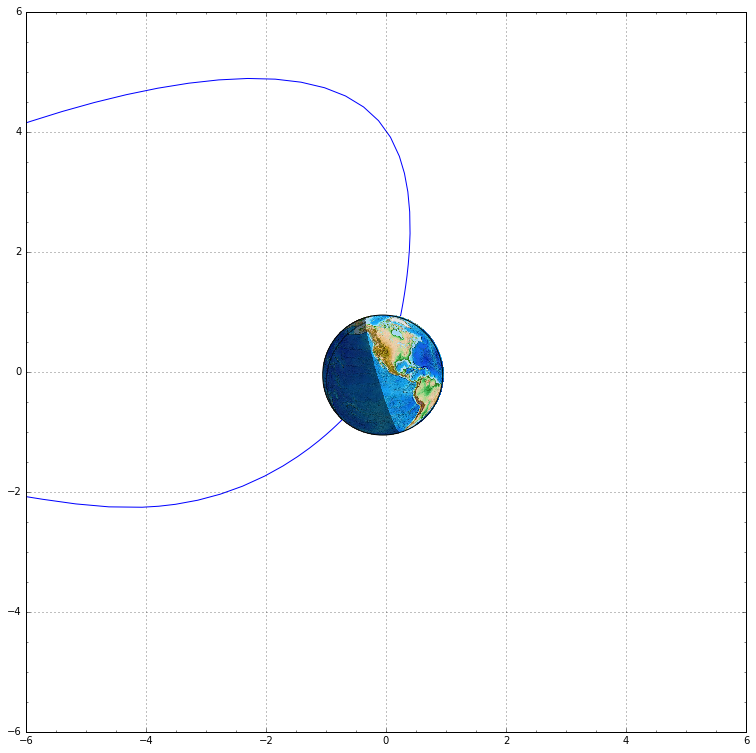

In [16]:
max_re    = 12.5
max_re    = 6.0
re_scale  = 2*max_re
earth_loc = 0.5-np.sqrt(2.0)/re_scale+0.06*3.0/max_re
az        = 0

fig3 = plt.figure(3,figsize=(10,10))

ax1  = fig3.add_axes([0.0,0.0,1.0,1.0])
#ax1  = fig3.add_axes([0.0,0.0,1.0,1.0],projection='3d')
ax1.set_xlim([-max_re,max_re])
ax1.set_ylim([-max_re,max_re])
#ax1.set_zlim([-max_re,max_re])
ax1.minorticks_on()
ax1.plot(fld[:,0],fld[:,2])
ax1.grid('on')
#ax1.plot(fld[:,0],fld[:,1],fld[:,2])
#ax1.view_init(elev=0,azim=0)

ax2     = fig3.add_axes([earth_loc,earth_loc,1.0/max_re,1.0/max_re])
my_map2 = Basemap(projection='ortho',lat_0=gsm_lat,lon_0=-90+gsm_lon)
my_map2.etopo()
my_map2.nightshade(dateAug04)
my_map2.ax = ax2

plt.show()

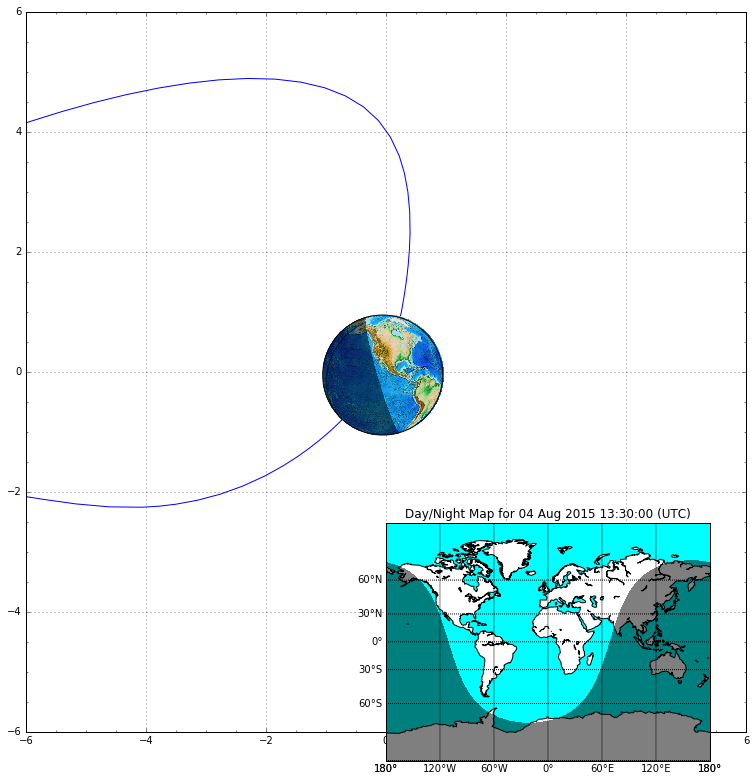

In [35]:
max_re    = 12.5
max_re    = 6.0
re_scale  = 2*max_re
earth_loc = 0.5-np.sqrt(2.0)/re_scale+0.06*3.0/max_re
az        = 0

fig3 = plt.figure(3,figsize=(10,10))

ax1  = fig3.add_axes([0.0,0.0,1.0,1.0])
#ax1  = fig3.add_axes([0.0,0.0,1.0,1.0],projection='3d')
ax1.set_xlim([-max_re,max_re])
ax1.set_ylim([-max_re,max_re])
#ax1.set_zlim([-max_re,max_re])
ax1.minorticks_on()
ax1.plot(fld[:,0],fld[:,2])
ax1.grid('on')
#ax1.plot(fld[:,0],fld[:,1],fld[:,2])
#ax1.view_init(elev=0,azim=0)

ax2     = fig3.add_axes([earth_loc,earth_loc,1.0/max_re,1.0/max_re])
my_map2 = Basemap(projection='ortho',lat_0=gsm_lat,lon_0=-90+gsm_lon)
my_map2.etopo()
my_map2.nightshade(dateAug04)
my_map2.ax = ax2

ax3     = fig3.add_axes([0.5,-0.1,0.45,0.45])
# miller projection
mill_map = Basemap(projection='mill',lon_0=0)
mill_map.ax = ax3
# plot coastlines, draw label meridians and parallels.
mill_map.drawcoastlines()
mill_map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
mill_map.drawmeridians(np.arange(mill_map.lonmin,mill_map.lonmax+30,60),labels=[0,0,0,1])
# fill continents 'coral' (with zorder=0), color wet areas 'aqua'
mill_map.drawmapboundary(fill_color='aqua')
mill_map.fillcontinents(color='white',lake_color='aqua')
# shade the night areas, with alpha transparency so the
# map shows through. Use current time in UTC.
#date = datetime.utcnow()
CS=mill_map.nightshade(dateAug04)
plt.title('Day/Night Map for %s (UTC)' % dateAug04.strftime("%d %b %Y %H:%M:%S"))

plt.show()